# COMP 551 Assignment 1 : Getting Started With Machine Learning

### K- Nearest Neighbors Experiments

#### Group 1: Rudi Kischer, Ben Hepditch

# Setup

- make sure to install the requirements.txt file, and to use the correct virtual environment with juptyer notebook

In [3005]:


from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 3)



def create_table_graph(df, scientific_notation=True):
    """
    Creates a graphical table from a pandas DataFrame using Plotly.
    Formats all float numbers (including NumPy floats) in scientific notation with three decimal places.
    Table header is gray, and cells are light gray.

    Parameters:
    df (pandas.DataFrame): The DataFrame to be converted into a graphical table.

    Returns:
    plotly.graph_objs._figure.Figure: A Plotly figure object representing the table.
    """
    # Function to format numbers in scientific notation
    def format_float(x):
        if scientific_notation:
            if isinstance(x, (float, np.float32, np.float64)):
                return '{:.3e}'.format(x)
        else:
            # round to 3 decimal places, no scientific notation
            if isinstance(x, (float, np.float32, np.float64)):
                return '{:.3f}'.format(x)
        return x

    df = df.applymap(format_float)

    fig = go.Figure(data=[go.Table(
        header=dict(values=list(df.columns),
                    fill_color='gray',  # Header color
                    align='left'),
        cells=dict(values=[df[k].tolist() for k in df.columns],
                   fill_color='lightgray',  # Cell color
                   align='left'))
    ])

    return fig


# Data

Dataset 1: NHANES age prediction.csv (National Health and Nutrition Health Sur- vey 2013-2014 (NHANES) Age Prediction Subset): https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

Dataset 2: Breast Cancer Wisconsin (Original) dataset: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

### Load Data

In [3006]:


# # DATASET 1: NHANES age prediction.csv
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887) 
dataset_1 = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data

dataset_1.name = 'NHANES_health_survey_age_prediction'
DATA_SET_1_NAME = dataset_1.name

# # DATASET 2: Breast Cancer Wisconsin
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
dataset_2 = breast_cancer_wisconsin_original.data

dataset_2.name = 'Breast_Cancer_Wisconsin'
DATA_SET_2_NAME = dataset_2.name

In [3007]:
print( len(dataset_2.features) )
print( len(dataset_2.targets) )

print( len(dataset_1.features))
print( len(dataset_1.targets) )

699
699
2278
2278


### Clean Data

- We want to remove all rows from our data sets which have null values in the targets or in the features.

In [3008]:
# Define Cleaning Function
def clean(dataset):
  X = dataset.features
  Y = dataset.targets
  missing_rows_features = X.isnull().any(axis=1)
  missing_rows_targets = Y.isnull().any(axis=1)
  missing_rows = missing_rows_features | missing_rows_targets
  
  print(f"features_missing: {missing_rows_features.sum()}")
  print(f"targets_missing: {missing_rows_targets.sum()}")

  X_clean = X[-missing_rows]
  Y_clean = Y[-missing_rows]
  print(f'{missing_rows.sum()} rows deleted')
  dataset.features = X_clean
  dataset.targets = Y_clean

  return dataset


In [3009]:
# Clean the DataSets
dataset_1 = clean(dataset_1)
dataset_2 = clean(dataset_2)

features_missing: 0
targets_missing: 0
0 rows deleted
features_missing: 16
targets_missing: 0
16 rows deleted


## Normalize the Features

In [3010]:
def normalize(dataset):
  X = dataset.features
  Y = dataset.targets
  X_normalized = (X - X.mean()) / X.std()
  dataset.features = X_normalized
  return dataset

dataset_1 = normalize(dataset_1)
dataset_2 = normalize(dataset_2)

### Target Statistics

- We want to get some statistics about our target values. We want to know the mean and the squared difference.

In [3011]:
# Define mean
def grouped_target_means(dataset):
    # grouped by the target
    X = dataset.features
    Y = dataset.targets

    XY = pd.concat([X,Y], axis=1)
    XY_grouped = XY.groupby(Y.columns[0])
    XY_mean = XY_grouped.mean()
    return XY_mean

# Define Feature Distance
def grouped_feature_distance(dataset):
    XY_mean = grouped_target_means(dataset)

    sqr_diff = (XY_mean.iloc[0] - XY_mean.iloc[1]) ** 2
    df_sqr_diff = pd.DataFrame([sqr_diff], index=['squarred_diff'])

    # make the squared diff the col
    # make the feature the row
    df_sqr_diff = df_sqr_diff.T
    # sort by the squared diff
    df_sqr_diff = df_sqr_diff.sort_values(by='squarred_diff', ascending=False)
    return df_sqr_diff

# Print Col Ranking
def feature_ranking(dataset):
    df_sqr_diff = grouped_feature_distance(dataset)
    # transpose the dataframe
    df_sqr_diff = df_sqr_diff.T
    row = df_sqr_diff.iloc[0]
    sorted_row = row.sort_values(ascending=False)

    ranking_df = pd.DataFrame({
      'Feature': sorted_row.index,
      'Value': sorted_row.values,
      'Rank': range(1, len(sorted_row) + 1)
    })

    return ranking_df


##### Feature Means

In [3012]:
# Get grouped means
print(f'Dataset 1 Feature Means:')
XY_1_bar = grouped_target_means(dataset_1)
print(XY_1_bar)

print(f'Dataset 2 Feature Means: ')
XY_2_bar = grouped_target_means(dataset_2)
print(XY_2_bar)


Dataset 1 Feature Means:
           RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN
age_group                                                         
Adult         0.001  -0.041   0.002  -0.051  -0.012  -0.106  0.028
Senior       -0.006   0.217  -0.010   0.267   0.061   0.557 -0.147
Dataset 2 Feature Means: 
       Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses
Class                                                                                                                                                                            
2               -0.524                   -0.602                    -0.603             -0.518                       -0.507       -0.603           -0.556           -0.527   -0.310
4                0.974                    1.118                     1.119              0.962                        0.941        1.121            1

##### Group Feature Distance

In [3013]:
print('Dataset 1:')
XY_1_fd = grouped_feature_distance(dataset_1)
print(XY_1_fd)

print('Dataset 2:')
XY_2_fd = grouped_feature_distance(dataset_2)
print(XY_2_fd)

Dataset 1:
          squarred_diff
LBXGLT        4.400e-01
LBXGLU        1.010e-01
PAQ605        6.689e-02
LBXIN         3.065e-02
DIQ010        5.189e-03
BMXBMI        1.280e-04
RIAGENDR      5.701e-05
Dataset 2:
                             squarred_diff
Bare_nuclei                          2.971
Uniformity_of_cell_shape             2.965
Uniformity_of_cell_size              2.957
Bland_chromatin                      2.524
Normal_nucleoli                      2.267
Clump_thickness                      2.243
Marginal_adhesion                    2.190
Single_epithelial_cell_size          2.096
Mitoses                              0.787


##### Features Ranked By Squared Difference

In [3014]:

print("Dataset 1 Feature Ranking")
d1_feature_ranking = feature_ranking(dataset_1)
print(d1_feature_ranking)

print("Dataset 2 Feature Ranking")
d2_feature_ranking = feature_ranking(dataset_2)
print(d2_feature_ranking)


# display table

# Create a table for the feature ranking
import plotly.graph_objects as go
fig = create_table_graph(d1_feature_ranking)
fig.show()

fig = create_table_graph(d2_feature_ranking)
fig.show()

Dataset 1 Feature Ranking
    Feature      Value  Rank
0    LBXGLT  4.400e-01     1
1    LBXGLU  1.010e-01     2
2    PAQ605  6.689e-02     3
3     LBXIN  3.065e-02     4
4    DIQ010  5.189e-03     5
5    BMXBMI  1.280e-04     6
6  RIAGENDR  5.701e-05     7
Dataset 2 Feature Ranking
                       Feature  Value  Rank
0                  Bare_nuclei  2.971     1
1     Uniformity_of_cell_shape  2.965     2
2      Uniformity_of_cell_size  2.957     3
3              Bland_chromatin  2.524     4
4              Normal_nucleoli  2.267     5
5              Clump_thickness  2.243     6
6            Marginal_adhesion  2.190     7
7  Single_epithelial_cell_size  2.096     8
8                      Mitoses  0.787     9


/var/folders/68/c6p0bwys2ld4z8kt07xh18cc0000gn/T/ipykernel_23026/3070378217.py:33: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



# Drop Unimportant Features

In [3015]:
#
def drop_unimportant_features(dataset, num_of_features_to_drop):
  # if the number of features to drop is greater than the number of features
  # throw an error
  if num_of_features_to_drop >= len(dataset.features.columns):
    raise ValueError('Number of features to drop is greater than the number of features')
  
  # get the feature ranking
  feature_ranking_df = feature_ranking(dataset)
  # drop the last n features
  features_to_drop = feature_ranking_df.tail(num_of_features_to_drop)['Feature']
  dataset.features = dataset.features.drop(columns=features_to_drop)
  return dataset


# Drop Unimportant Features
dataset_1 = drop_unimportant_features(dataset_1, 3)
dataset_2 = drop_unimportant_features(dataset_2, 3)

print("Dataset 1 Feature Ranking")
d1_feature_ranking = feature_ranking(dataset_1)
print(d1_feature_ranking)

print("Dataset 2 Feature Ranking")
d2_feature_ranking = feature_ranking(dataset_2)
print(d2_feature_ranking)


Dataset 1 Feature Ranking
  Feature  Value  Rank
0  LBXGLT  0.440     1
1  LBXGLU  0.101     2
2  PAQ605  0.067     3
3   LBXIN  0.031     4
Dataset 2 Feature Ranking
                    Feature  Value  Rank
0               Bare_nuclei  2.971     1
1  Uniformity_of_cell_shape  2.965     2
2   Uniformity_of_cell_size  2.957     3
3           Bland_chromatin  2.524     4
4           Normal_nucleoli  2.267     5
5           Clump_thickness  2.243     6


-  TODO: *Description goes here analyzing if the features that are strongly different are associated with the target*

- Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

# Models

### K-Nearest Neighbors

- k nearest neighbour uses a data set to predict the classification of a new data point. The algorithm works by finding the k nearest neighbours to the new data point and classifying the new data point as the most common classification of the k nearest neighbours. The algorithm can be used for both classification and regression problems. For classification problems, the algorithm uses the most common classification of the k nearest neighbours. For regression problems, the algorithm uses the average of the k nearest neighbours.

##### Distance function

In [3016]:
 


def euclidean(x1, x2):
  return np.linalg.norm(x1 - x2)

def manhattan(x1,x2):
  # x1 and x2 are np arrays
  return np.abs(x1 - x2).sum()

def chebyshev(x1, x2):
  return np.abs(x1 - x2).max()

def hamming(x1, x2):
  return (x1 != x2).sum()

def cosineSim(x1, x2):
  prod = x1.dot(x2)
  mag = np.linalg.norm(x1) * np.linalg.norm(x2)
  return prod / mag

### KNN Model

In [3017]:

# K nearest Neighbour
# Mostly following the design from :
# https://github.com/yueliyl/comp551-notebooks/blob/master/KNN.ipynb

class KNN():

  def __init__(self, k=1, similarity_fn=None):
    if not similarity_fn:
      similarity_fn = euclidean
    self.similarity_fn = similarity_fn
    self.k = k
  
  def standardize_features(self):
    x_d_bar = self.X.mean()
    x_d_sd = self.X.std(ddof=0)
    self.X = (self.X - x_d_bar) / x_d_sd

  def fit(self, X, Y, k):
    self.X = X
    self.Y = Y
    self.k = k

    self.Y_np = Y.to_numpy()
    self.X_np = X.to_numpy()
    # self.C = self.Y[:, 0].nunique()
    # self.standardize_features()


  def predict_sample(self, x_i):
    similiartity_scores = np.apply_along_axis(self.similarity_fn, axis=1, arr=self.X_np, x2=x_i)
    top_k_idx = np.argpartition(similiartity_scores, self.k)[:self.k]
    top_k_neighbour_labels = self.Y_np[top_k_idx]
    labels = np.unique(self.Y_np[:, 0])
    # get a count for each label in the top k neighbour
    # we want to have a mapping from each label to the number of times it appears in the top k
    label_counts = np.array([np.count_nonzero(top_k_neighbour_labels == label) for label in labels])
    label_probs = label_counts / self.k
    # convert the probs into a data frame with one column for each label
    # the rows are the probabilities for each label
    # the index should be the same index as the input
    return label_probs
    # similiarity_scores = self.X.apply(lambda x_j: self.similiarity_fn(x_i,x_j), axis=1)
    # top_k_idx = similiarity_scores.nsmallest(self.k).index 
    # top_k_neighbour_labels =  self.Y.loc[top_k_idx][self.Y.columns[0]]
    # labels = self.Y.iloc[:, 0].unique()
    # label_probs = top_k_neighbour_labels.value_counts(normalize=True).reindex(labels, fill_value=0)
    # return pd.Series(label_probs, index=labels)
  
  def predict(self, x):
    # print(x)
    x_np = x.to_numpy()
    labels = np.unique(self.Y_np[:, 0])
    label_probs = np.apply_along_axis(self.predict_sample, axis=1, arr=x_np)
    label_probs = pd.DataFrame(label_probs, columns=labels)
    label_probs.index = x.index
    # we want the index of the col with the highest probability
    # y_index = np.argmax(label_probs, axis=1)
    # # map the index to the label
    # labels = self.Y.iloc[:, 0].unique()
    # y = labels[y_index]
    # # now we want a data frame, with one column for each label
    # # and for each row that has that label, it gets a 1, otherwise 0 in that column
    # # so there should be two columns, one for each label
    # # and the number of rows should be the number of rows in the input
    # y_df = pd.DataFrame(0, index=np.arange(len(y)), columns=labels)
    # for i, label in enumerate(y):
    #   y_df.loc[i, label] = 1
    # # we need to maintain the same index as the input
    # y_df.index = x.index
    return label_probs
    # return y_df, label_probs
    # prob_df = x.apply(self.predict_sample, axis=1)
    # y = prob_df.idxmax(axis=1)
    # predicted_probabilities = prob_df
    # y_df = pd.DataFrame(y, columns=self.Y.columns)
    # return y_df, predicted_probabilities



# Decision Tree

### Cost Functions

In [3018]:
def misclassification_error(y_Rk, C):
  # we want to get the most frequent label, and then the cost is the number
  # of samples that are not the most frequent label
  if len(y_Rk) == 0:
    return 0
  # get the label with the highest frequency
  w_k = y_Rk.iloc[:, 0].value_counts().idxmax()
  cost = (y_Rk != w_k).mean()
  return cost.iloc[0]

def entropy(y_Rk, C):
  # entropy:
  # -SUM_C P(C) log(P(C))
  # we need to get the probability of each class

  def entropy_c(c):
    if len(y_Rk) == 0:
      return 0
    p_c = (y_Rk == c).mean().iloc[0]
    if p_c == 0:
      return 0
    return -p_c * np.log(p_c)
  # sum up entrop of each class, and weight it by the number of samples in that class
  H = 0
  for c in C:
    H += entropy_c(c)
  return H

def gini_index(y_Rk, C):
  # the gini index represents the variance of the class distribution
  if len(y_Rk) == 0:
    return 0
  def gini_c(c):
    p_c = (y_Rk == c).mean().iloc[0]
    return p_c ** 2
  GI = 1 - sum(gini_c(c) for c in C)
  return GI * len(y_Rk)

  

### Decision Node

# Threshold Selection

In [3019]:


def greedy_split(X, Y, C, cost_fn):

  min_cost = np.inf
  best_feature = None
  best_threshold = None
  
  for feature in X.columns:
    for threshold in X[feature].unique():
      left = X[feature] < threshold
      right = ~left
      # weighted cost of the two children
      cost = (1/len(Y)) * ( len(Y[left]) * cost_fn(Y[left], C) + len(Y[right]) * cost_fn(Y[right], C) )
      if cost < min_cost:
        min_cost = cost
        best_feature = feature
        best_threshold = threshold
  return min_cost, best_feature, best_threshold     


In [3020]:
# https://colab.research.google.com/github/yueliyl/comp551-notebooks/blob/master/DecisionTree.ipynb

class DTNode():

  def __init__(self, datum_idexes, parent):
    self.left = None
    self.right = None
    self.feature = None
    self.threshold = None
    if parent:
      self.depth = parent.depth + 1
      self.parent = parent
      self.X = parent.X[datum_idexes]
      self.Y = parent.Y[datum_idexes]
    else:
      self.depth = 0
      self.parent = None
      self.X = None
      self.Y = None

### Decision Tree Model

In [3021]:

class DT():
  
  def __init__(self,
                max_depth=3,
                min_leaf_instance=1,
                discrete_labels=True,
                cost_fn=gini_index):
    self.max_depth = max_depth
    self.root = None
    self.cost_fn = cost_fn
    self.min_leaf_instance = min_leaf_instance
    self.discrete_labels = discrete_labels


  def _fit_tree(self, node):
      if node.depth >= self.max_depth:
        return
      if len(node.Y) <= self.min_leaf_instance:
        return
      
      min_cost, best_feature, best_threshold = greedy_split(node.X, node.Y,self.C,cost_fn=self.cost_fn)
      if min_cost == np.inf:
        return
      
      node.split_feature = best_feature
      node.split_threshold = best_threshold

      # print(node.depth, best_feature, best_threshold, min_cost)

      # now we need all the indexs that are less than the threshold
      left_idx = node.X[node.split_feature] < node.split_threshold
      right_idx = ~left_idx

      # if the left or right index is empty, we should stop
      if len(node.X[left_idx]) == 0 or len(node.X[right_idx]) == 0:
        return 


      node.left = DTNode(left_idx, node)
      node.right = DTNode(right_idx, node)

      self._fit_tree(node.left)
      self._fit_tree(node.right)

  def fit(self, X, Y):
    self.X = X
    self.Y = Y
    if self.discrete_labels:
      self.C = np.unique(Y)
    self.root = DTNode(X.index, None)
    self.root.X = X
    self.root.Y = Y
    self.root.C = self.C
    self._fit_tree(self.root)
    return self

  def get_leaf(self, x_i, node):
    if node.left is None and node.right is None:
      return node
    
    # get index of the feature we are splitting on
    # feature_idx = self.X.columns.get_loc(node.split_feature)
    if x_i[node.split_feature] < node.split_threshold:
      return self.get_leaf(x_i, node.left)
    else:
      return self.get_leaf(x_i, node.right)

  def _predict_sample(self, x_i):
      leaf = self.get_leaf(x_i, self.root)
      # we want to return the probability of each label in the leaf
      labels = self.C
      # get the probs of each label in the leaf, make sure to handle cases where there are zero of a label
      label_probs = np.array([np.count_nonzero(leaf.Y == label) / len(leaf.Y) for label in labels])
      return label_probs

  def predict(self, x):
    # we want to navigate to the leaf for each sample
    # then we want to make a column for each label
    # the column should store the perctage of samples with that label in the leaf
    # we should return a data frame with the same index as the input
    labels = self.C
    label_probs = x.apply(self._predict_sample, axis=1)
    label_probs = pd.DataFrame(label_probs.tolist(), columns=labels, index=x.index)
    return label_probs

# Experiments

## Splitting Data
- We will start by first splitting the data into training and testing sets.

In [3022]:

def train_test_split(dataset, split, shuffle=True, seed=434341): # seed =1 
    X = dataset.features
    Y = dataset.targets
    XY = pd.concat([X, Y], axis=1)
    XY_shuffled = XY.sample(frac=1, random_state=seed) #.reset_index(drop=True)
    split_idx = int(len(XY) * split)
    
    y_size = -Y.shape[1]

    # Train Data Set
    train_set = XY_shuffled[split_idx:]
    X_train = train_set.iloc[:, :y_size]
    Y_train = train_set.iloc[:, y_size:]

    # Test Data Set
    test_set = XY_shuffled[:split_idx]
    X_test = test_set.iloc[:, :y_size]
    Y_test = test_set.iloc[:, y_size:]

    # we need to maintain the the original index

    return X_train, Y_train, X_test, Y_test

## Experiments
- We will evaluate various metrics over our two different models , and our two different data sets.

In [3023]:

# Evaluation functions
def get_knn_probs(X_t, Y_t, X_e, k):
  knn = KNN()
  knn.fit(X_t, Y_t, k)
  return knn.predict(X_e)

#### Receiver Operating Characteristic (ROC) functions

In [3024]:
from sklearn import metrics
import matplotlib.pyplot as plt

def get_auc_score(Y, label_probs, label):
  # get the label the most common label in the test set
  fpr, tpr, _ = metrics.roc_curve(Y, label_probs[label], pos_label=label)
  roc_auc = metrics.auc(fpr, tpr)
  return fpr, tpr, roc_auc


def plot_roc_curve(fpr, tpr, roc_auc, title, label):
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel(f'False Positive Rate {label}')
  plt.ylabel(f'True Positive Rate {label}')
  plt.title(title)
  plt.legend(loc="lower right")
  plt.show()

def plot_t_e_roc_curve(fpr_t, tpr_t, roc_auc_t, fpr_e, tpr_e, roc_auc_e, title):
  plt.figure()
  plt.plot(fpr_t, tpr_t, color='darkorange', lw=2, label='ROC curve Train (area = %0.2f)' % roc_auc_t)
  plt.plot(fpr_e, tpr_e, color='navy', lw=2, label='ROC curve Test (area = %0.2f)' % roc_auc_e)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  plt.legend(loc="lower right")
  plt.show()

def roc_curve(Y, label_probs):
    label = Y.iloc[:, 0].value_counts().idxmax()
    fpr, tpr, roc_auc = get_auc_score(Y, label_probs, label)
    accuracy = metrics.accuracy_score(Y, label_probs.idxmax(axis=1))
    return fpr, tpr, roc_auc, accuracy

## Experiment 1: AUROC Comparison between KNN and Decision Tree

In [3025]:
def get_dt_probs(dt, X_e, max_depth, min_leaf_instance):
  dt.max_depth = max_depth
  dt.min_leaf_instance = min_leaf_instance
  return dt.predict(X_e)



def plot_multiple_roc_curves(roc_curves, title):
  # roc_cruves is a dict mapping from the curve name to a tuple of (fpr, tpr, roc_auc)
  plt.figure()
  for name, curve in roc_curves.items():
    fpr, tpr, roc_auc = curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  plt.legend(loc="lower right")
  plt.show()

def plot_accuracy_bar_chart(accuracies, title):
  # plot a double bar chart, with the train and test accuracy for each model
  # label the accuracy bars with the accuracy
  # set an appropriate limit for the y axis
  # get the max and min accuracy
  # get the diff between the max and min and add relative padding
  labels = list(accuracies.keys())
  train_accuracies = [accuracy[0] for accuracy in accuracies.values()]
  test_accuracies = [accuracy[1] for accuracy in accuracies.values()]

  max_acc = max(max(train_accuracies), max(test_accuracies))
  min_acc = min(min(train_accuracies), min(test_accuracies))
  diff = max_acc - min_acc
  padding = diff * 0.1
  x = np.arange(len(labels))
  width = 0.35
  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train')
  rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test')
  ax.set_ylabel('Accuracy')
  ax.set_title(title)
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  ax.set_ylim([min_acc - padding, max_acc + padding])
  # set the accuracy on top of the bars
  for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
  for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
  plt.show()

def plot_AUROC_bar_charts(roc_curves, title):
  # plot a double bar chart, with the train and test accuracy for each model
  # label the accuracy bars with the accuracy
  # set an appropriate limit for the y axis
  # get the max and min accuracy
  # get the diff between the max and min and add relative padding
  labels = list(roc_curves.keys())
  train_roc_auc = [roc_auc[0] for roc_auc in roc_curves.values()]
  test_roc_auc = [roc_auc[1] for roc_auc in roc_curves.values()]

  max_auc = max(max(train_roc_auc), max(test_roc_auc))
  min_auc = min(min(train_roc_auc), min(test_roc_auc))
  diff = max_auc - min_auc
  padding = diff * 0.1
  x = np.arange(len(labels))
  width = 0.35
  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, train_roc_auc, width, label='Train')
  rects2 = ax.bar(x + width/2, test_roc_auc, width, label='Test')
  ax.set_ylabel('AUROC')
  ax.set_title(title)
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  ax.set_ylim([min_auc - padding, max_auc + padding])
  # set the accuracy on top of the bars
  for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
  for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
  plt.show()


def experiment1(D, test_split=0.2, k=70, max_depth=10, min_leaf_instance=1):

  # we will be comparing the performance of the KNN and DT on the two datasets
  X_t, Y_t, X_e, Y_e = train_test_split(D, test_split)

  knn_probs_t = get_knn_probs(X_t, Y_t, X_t, k)
  knn_probs_e = get_knn_probs(X_t, Y_t, X_e, k)
  fpr_knn_t, tpr_knn_t, roc_auc_knn_t, accuracy_knn_t = roc_curve(Y_t, knn_probs_t)
  fpr_knn_e, tpr_knn_e, roc_auc_knn_e, accuracy_knn_e = roc_curve(Y_e, knn_probs_e)


  dt = DT(max_depth=max_depth, min_leaf_instance=min_leaf_instance)
  dt.fit(X_t, Y_t)
  dt_test_probs = get_dt_probs(dt, X_e, max_depth, min_leaf_instance)
  dt_train_probs = get_dt_probs(dt, X_t, max_depth, min_leaf_instance)
  fpr_dt_t, tpr_dt_t, roc_auc_dt_t, accuracy_dt_t = roc_curve(Y_t, dt_train_probs)
  fpr_dt_e, tpr_dt_e, roc_auc_dt_e, accuracy_dt_e = roc_curve(Y_e, dt_test_probs)

  curves = {
    'KNN Train k=13': (fpr_knn_t, tpr_knn_t, roc_auc_knn_t),
    'KNN Test k=13': (fpr_knn_e, tpr_knn_e, roc_auc_knn_e),
    'DT Train d=10': (fpr_dt_t, tpr_dt_t, roc_auc_dt_t),
    'DT Test d=10': (fpr_dt_e, tpr_dt_e, roc_auc_dt_e)
  }


  accuracies = {
    'KNN': (accuracy_knn_t, accuracy_knn_e),
    'DT': (accuracy_dt_t, accuracy_dt_e)
  }

  AUROC_SCORES = {
    'KNN': (roc_auc_knn_t, roc_auc_knn_e),
    'DT': (roc_auc_dt_t, roc_auc_dt_e)
  }

  # multiply the accuracies by 100 to get a percentage
  accuracies = {k: tuple(map(lambda x: x * 100, v)) for k, v in accuracies.items()}

  return curves, accuracies, AUROC_SCORES


  
d1_curves, d1_accuracies, d1_auroc = experiment1(dataset_1, max_depth=4, k=30)
d2_curves, d2_accuracies, d2_auroc = experiment1(dataset_2, max_depth=7, k=6)



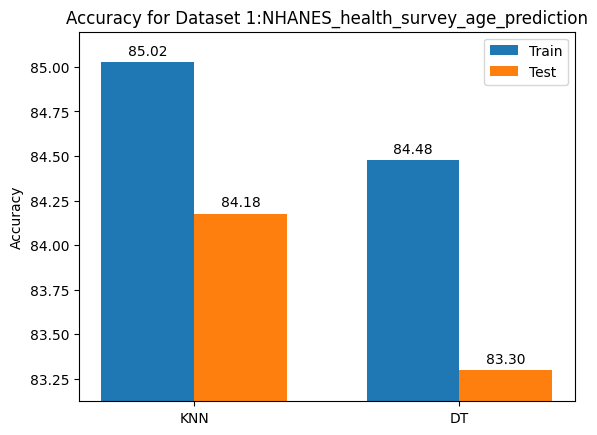

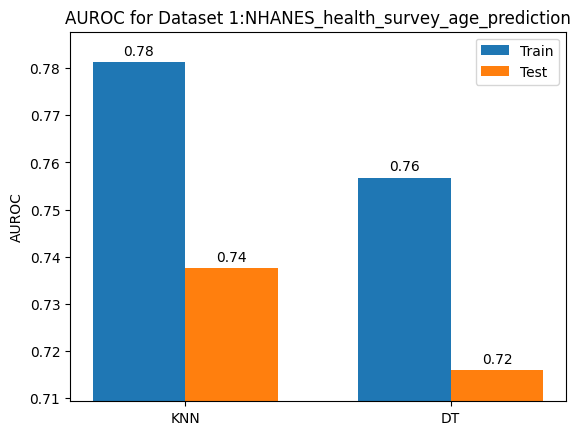

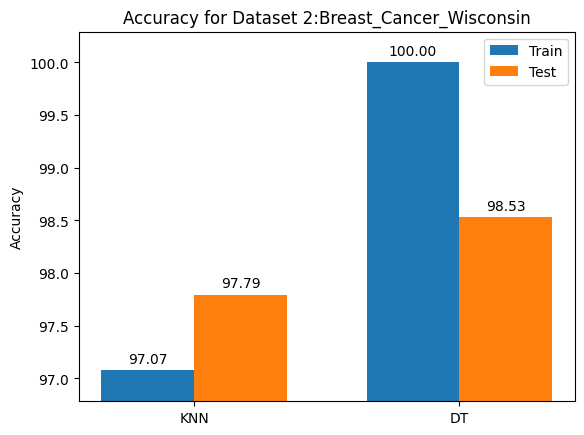

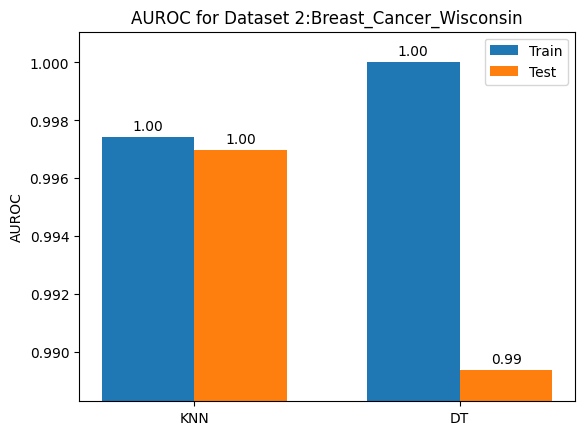

D1
{'KNN': (85.0246845858475, 84.17582417582418), 'DT': (84.47613823368074, 83.2967032967033)}
{'KNN': (0.7812148392131243, 0.737562701848416), 'DT': (0.7567429315476191, 0.715866144437573)}
D2
{'KNN': (97.07495429616088, 97.79411764705883), 'DT': (100.0, 98.52941176470588)}
{'KNN': (0.9974111675126903, 0.9969604863221884), 'DT': (1.0, 0.9893617021276595)}


/var/folders/68/c6p0bwys2ld4z8kt07xh18cc0000gn/T/ipykernel_23026/3070378217.py:33: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [3026]:
# plot_multiple_roc_curves(d1_curves, f'ROC Curves for Dataset 1: {DATA_SET_1_NAME}')
plot_accuracy_bar_chart(d1_accuracies, f'Accuracy for Dataset 1:{DATA_SET_1_NAME}')
plot_AUROC_bar_charts(d1_auroc, f'AUROC for Dataset 1:{DATA_SET_1_NAME}')

# plot_multiple_roc_curves(d2_curves, f'ROC Curves for Dataset 2:{DATA_SET_2_NAME}')
plot_accuracy_bar_chart(d2_accuracies, f'Accuracy for Dataset 2:{DATA_SET_2_NAME}')
plot_AUROC_bar_charts(d2_auroc, f'AUROC for Dataset 2:{DATA_SET_2_NAME}')

print('D1')
print(d1_accuracies)
print(d1_auroc)
print('D2')
print(d2_accuracies)
print(d2_auroc)


# make the data into a single data frame for easy comparison
# we want to have a row for each model + dataset
# then we want to have a column for each metric, one for train accuracy, one for test accuracy, one for train AUROC, and one for test AUROC

# the columns are:
# Model, Dataset, Train Accuracy, Test Accuracy, Train AUROC, Test AUROC

exp1_df = pd.DataFrame({
  'Model': ['KNN', 'KNN', 'DT', 'DT'],
  'Dataset': [DATA_SET_1_NAME, DATA_SET_1_NAME, DATA_SET_1_NAME, DATA_SET_1_NAME],
  'Train Accuracy': [d1_accuracies['KNN'][0], d1_accuracies['KNN'][1], d1_accuracies['DT'][0], d1_accuracies['DT'][1]],
  'Test Accuracy': [d2_accuracies['KNN'][0], d2_accuracies['KNN'][1], d2_accuracies['DT'][0], d2_accuracies['DT'][1]],
  'Train AUROC': [d1_auroc['KNN'][0], d1_auroc['KNN'][1], d1_auroc['DT'][0], d1_auroc['DT'][1]],
  'Test AUROC': [d2_auroc['KNN'][0], d2_auroc['KNN'][1], d2_auroc['DT'][0], d2_auroc['DT'][1]]
})
  # display the data frame
exp1_table = create_table_graph(exp1_df)
exp1_table.show()





In [3027]:
def display_table(df, font_size=12):
    df = df.copy()
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = df[col].apply(lambda x: f'{x:.3f}')
    # Find the maximum width of the index column
    idx_max_width = max([len(str(idx)) for idx in df.index]) * font_size * 0.01

    # Find the maximum width of the data and headers
    col_max_widths = [max(df[col].astype(str).apply(lambda x: len(x)).max(), len(col)) 
                      for col in df.columns]

    # Calculate the total width of the table
    total_width = idx_max_width + sum(col_max_widths) * font_size * 0.01

    # Estimate height of the table based on number of rows
    total_height = len(df) * font_size * 0.010

    # Create figure
    fig, ax = plt.subplots(figsize=(total_width, total_height))
    ax.axis('off')
    
    # Create the table
    tbl = table(ax, df, loc='center', cellLoc='center', rowLoc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(font_size)
    tbl.scale(1.2, 1.2) # Scaling factor for table size

    # Draw canvas once to compute precise bounding boxes
    canvas = FigureCanvas(fig)
    canvas.draw()

    # Adjust layout to make room for the table
    bbox = tbl.get_window_extent(canvas.get_renderer())
    fig.set_size_inches(bbox.width / fig.dpi, bbox.height / fig.dpi)

    # plt.savefig('/mnt/data/table_plot.png', bbox_inches='tight', dpi=300)
    plt.show()

## Experiment 2: KNN with different k values

In [3028]:
# define test conditions
def experiment2(D, test_split=0.2, k_start=1, k_stop=10, k_step=1):
  X_t, Y_t, X_e, Y_e = train_test_split(D, test_split)

  # get all even multiples of step, that are within the range of k_start and k_stop
  k_values = [k for k in range(k_start, k_stop + 1) if k % k_step == 0]
  # insetrt start and stop if they are not in the list
  if k_start not in k_values:
    k_values.insert(0, k_start)
  if k_stop not in k_values:
    k_values.append(k_stop)



  results = []

  for k in k_values:
    test_label_probs = get_knn_probs(X_t, Y_t, X_e, k)
    train_label_probs = get_knn_probs(X_t, Y_t, X_t, k)
    fpr_t, tpr_t, roc_auc_t, accuracy_t = roc_curve(Y_t, train_label_probs)
    fpr_e, tpr_e, roc_auc_e, accuracy_e = roc_curve(Y_e, test_label_probs)



    print(f'k={k}, AUC_t={roc_auc_t}, AUC_e={roc_auc_e}, Accuracy_t={accuracy_t}, Accuracy_e={accuracy_e}')
    results.append({
      'k': k,
      'AUC_t': roc_auc_t,
      'AUC_e': roc_auc_e,
      'Accuracy_t': accuracy_t,
      'Accuracy_e': accuracy_e,
      'fpr_t': fpr_t,
      'tpr_t': tpr_t,
      'fpr_e': fpr_e,
      'tpr_e': tpr_e
    })
  
  results = pd.DataFrame(results)

  return results

# Run the experiment on the two datasets
results_1 = experiment2(dataset_1, k_stop=100, k_step=10)

results_2 = experiment2(dataset_2)






k=1, AUC_t=1.0, AUC_e=0.5741943241943241, Accuracy_t=1.0, Accuracy_e=0.7736263736263737
k=10, AUC_t=0.849520905923345, AUC_e=0.7292139077853363, Accuracy_t=0.85957213384531, Accuracy_e=0.832967032967033
k=20, AUC_t=0.7978538309378629, AUC_e=0.7517522160379304, Accuracy_t=0.8529895776193088, Accuracy_e=0.832967032967033
k=30, AUC_t=0.7812148392131243, AUC_e=0.737562701848416, Accuracy_t=0.850246845858475, Accuracy_e=0.8417582417582418
k=40, AUC_t=0.7771804224738675, AUC_e=0.7439703153988868, Accuracy_t=0.8475041140976413, Accuracy_e=0.8307692307692308
k=50, AUC_t=0.7687860681620208, AUC_e=0.7338864838864838, Accuracy_t=0.8491497531541415, Accuracy_e=0.832967032967033
k=60, AUC_t=0.7665834149970964, AUC_e=0.7269806912664056, Accuracy_t=0.850246845858475, Accuracy_e=0.832967032967033
k=70, AUC_t=0.7624900188734031, AUC_e=0.7325980897409468, Accuracy_t=0.8507953922106418, Accuracy_e=0.8351648351648352
k=80, AUC_t=0.7621701691347271, AUC_e=0.7484539270253556, Accuracy_t=0.8518924849149753, 

In [3029]:
# plot the results for roc of each k value (k- value x axis, AUC y axis)

def plot_results_exp2(results, title):

  plt.plot(results['k'], results['Accuracy_e'],results['k'], results['Accuracy_t'], label='Test Accuracy')
  plt.xlabel('k')
  plt.ylabel('Accuracy')
  # add label key for the line
  plt.legend()
  plt.title(title)
  plt.show()


  # plot the AUC for each k value
  plt.plot(results['k'], results['AUC_e'],results['k'], results['AUC_t'], label='Test AUC')
  plt.xlabel('k')
  plt.ylabel('AUC')
  # add label key for the line
  plt.legend()
  plt.title(title)
  plt.show()
  


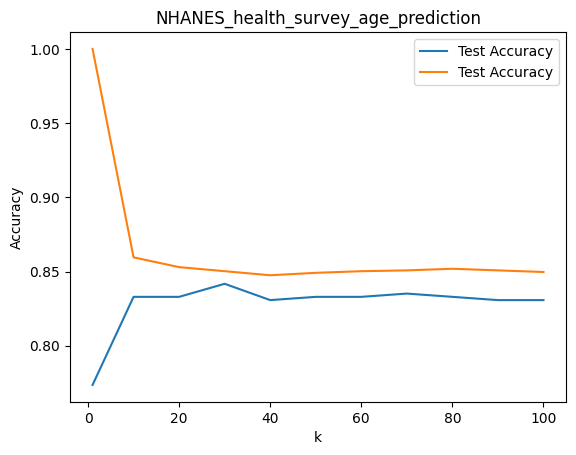

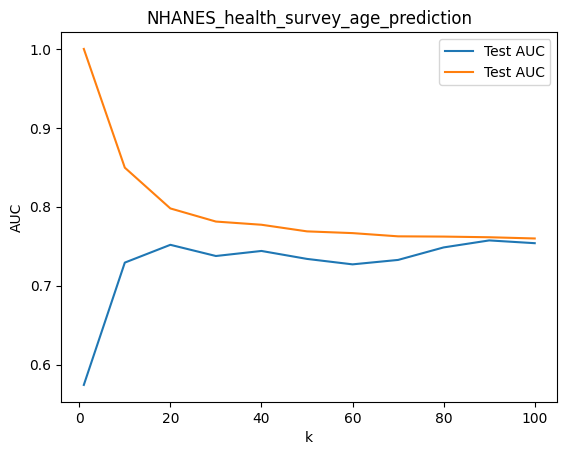

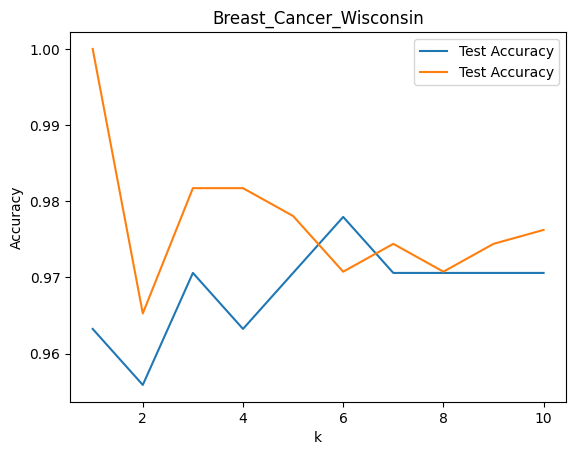

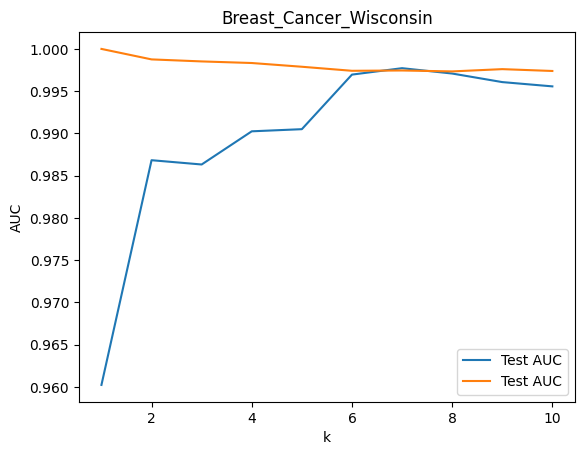

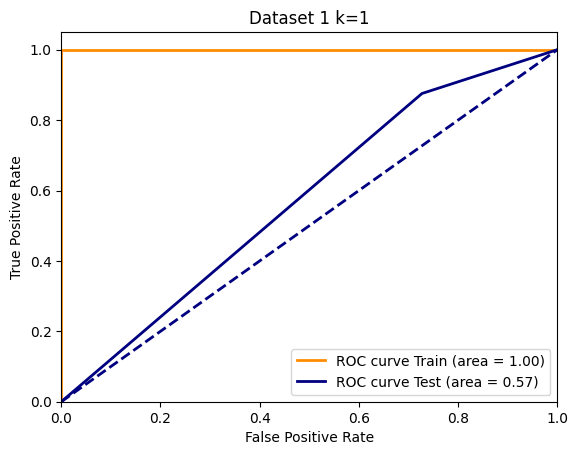

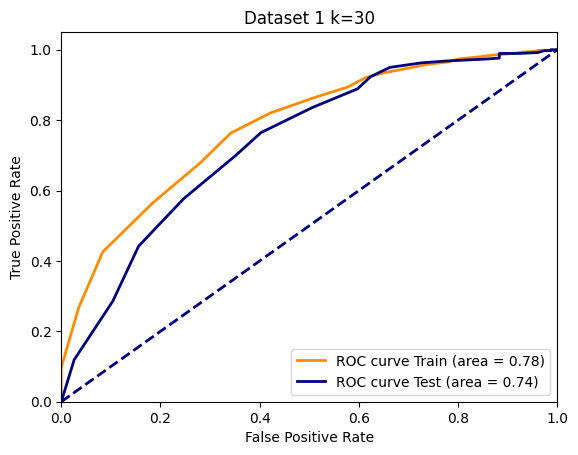

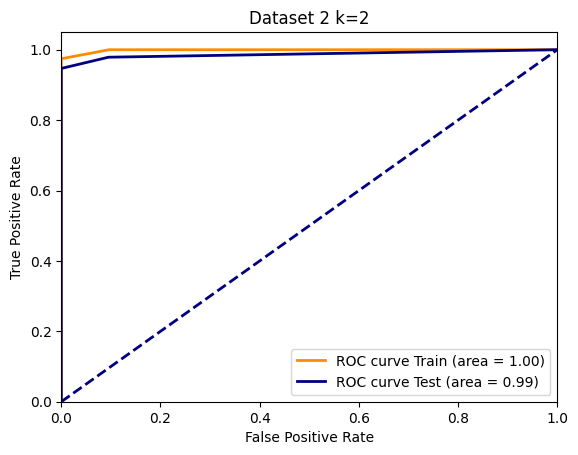

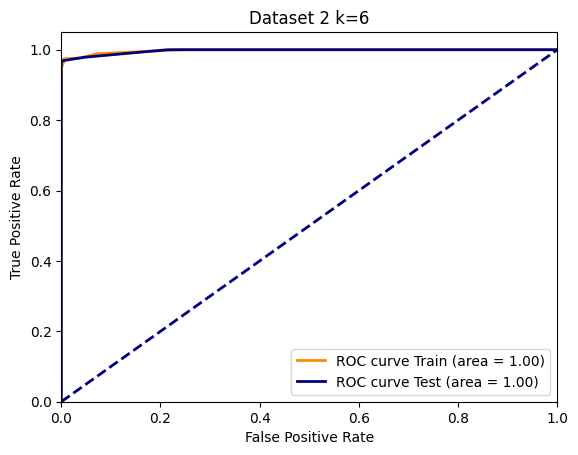

In [3030]:
# plot the results for each dataset
plot_results_exp2(results_1, DATA_SET_1_NAME)
plot_results_exp2(results_2, DATA_SET_2_NAME)

# plot the roc curve for the best k value, the worst k value, and the middle k value
def plot_k_roc(results, k_values, title):
  for k in k_values:
    row = results[results['k'] == k]
    fpr = row['fpr_e'].values[0]
    tpr = row['tpr_e'].values[0]
    roc_auc = row['AUC_e'].values[0]
    fpr_t = row['fpr_t'].values[0]
    tpr_t = row['tpr_t'].values[0]
    roc_auc_t = row['AUC_t'].values[0]
    plot_t_e_roc_curve(fpr_t, tpr_t, roc_auc_t, fpr, tpr, roc_auc, title + f' k={k}')

def get_k_to_plot(results):
  min_auc = results['Accuracy_e'].min()
  max_auc = results['Accuracy_e'].max()
  # get the k values for the min, max, and median AUC
  min_k_values = results[results['Accuracy_e'] == min_auc]['k']
  max_k_values = results[results['Accuracy_e'] == max_auc]['k']

  # get the first from each series
  min_k = min_k_values.iloc[0]
  max_k = max_k_values.iloc[0]
  # middle_k = middle_k_values.iloc[0]
  k_values = [min_k, max_k]
  return k_values

plot_k_roc(results_1, get_k_to_plot(results_1), 'Dataset 1')
plot_k_roc(results_2, get_k_to_plot(results_2), 'Dataset 2')


## Experiment 3: Decision Tree with different depth values

In [3031]:
def experiment3(D, test_split=0.2, max_depth_start=1, max_depth_stop=10, max_depth_step=1, min_leaf_instance=1):
  X_t, Y_t, X_e, Y_e = train_test_split(D, test_split)

  # get all even multiples of step, that are within the range of k_start and k_stop
  max_depth_values = [d for d in range(max_depth_start, max_depth_stop + 1) if d % max_depth_step == 0]
  # insetrt start and stop if they are not in the list
  if max_depth_start not in max_depth_values:
    max_depth_values.insert(0, max_depth_start)
  if max_depth_stop not in max_depth_values:
    max_depth_values.append(max_depth_stop)

  results = []

  for max_depth in max_depth_values:
    dt = DT(max_depth=max_depth, min_leaf_instance=min_leaf_instance)
    dt.fit(X_t, Y_t)
    test_label_probs = get_dt_probs(dt, X_e, max_depth, min_leaf_instance)
    train_label_probs = get_dt_probs(dt, X_t, max_depth, min_leaf_instance)
    fpr_t, tpr_t, roc_auc_t, accuracy_t = roc_curve(Y_t, train_label_probs)
    fpr_e, tpr_e, roc_auc_e, accuracy_e = roc_curve(Y_e, test_label_probs)

    print(f'max_depth={max_depth}, AUC_t={roc_auc_t}, AUC_e={roc_auc_e}, Accuracy_t={accuracy_t}, Accuracy_e={accuracy_e}')
    results.append({
      'max_depth': max_depth,
      'AUC_t': roc_auc_t,
      'AUC_e': roc_auc_e,
      'Accuracy_t': accuracy_t,
      'Accuracy_e': accuracy_e,
      'fpr_t': fpr_t,
      'tpr_t': tpr_t,
      'fpr_e': fpr_e,
      'tpr_e': tpr_e
    })

  results = pd.DataFrame(results)

  return results

# Run the experiment on the two datasets
results_1 = experiment3(dataset_1, max_depth_stop=20, max_depth_step=2)
results_2 = experiment3(dataset_2)


max_depth=1, AUC_t=0.6551747604529616, AUC_e=0.6806156806156806, Accuracy_t=0.8425671969281404, Accuracy_e=0.8307692307692308
max_depth=2, AUC_t=0.7052720764372823, AUC_e=0.7091836734693877, Accuracy_t=0.8425671969281404, Accuracy_e=0.8307692307692308
max_depth=4, AUC_t=0.7567429315476191, AUC_e=0.715866144437573, Accuracy_t=0.8447613823368074, Accuracy_e=0.832967032967033
max_depth=6, AUC_t=0.8292524136178863, AUC_e=0.7215350786779359, Accuracy_t=0.8623148656061437, Accuracy_e=0.8263736263736263
max_depth=8, AUC_t=0.9687171076509872, AUC_e=0.6401944616230331, Accuracy_t=0.9237520570488206, Accuracy_e=0.7846153846153846
max_depth=10, AUC_t=0.9998820412311266, AUC_e=0.6184291898577613, Accuracy_t=0.9945145364783324, Accuracy_e=0.7714285714285715
max_depth=12, AUC_t=1.0, AUC_e=0.6103896103896104, Accuracy_t=1.0, Accuracy_e=0.7736263736263737
max_depth=14, AUC_t=1.0, AUC_e=0.6103896103896104, Accuracy_t=1.0, Accuracy_e=0.7736263736263737
max_depth=16, AUC_t=1.0, AUC_e=0.6103896103896104, 

In [3032]:
def plot_result_exp3(results, title):
  plt.plot(results['max_depth'], results['AUC_e'], label='Test AUC')
  plt.xlabel('max_depth')
  plt.ylabel('AUC')
  plt.title(title)
  plt.show()

  # plot the accuracy for each max_depth value
  plt.plot(results['max_depth'], results['Accuracy_e'], label='Test Accuracy')
  plt.xlabel('max_depth')
  plt.ylabel('Accuracy')
  plt.title(title)
  plt.show()

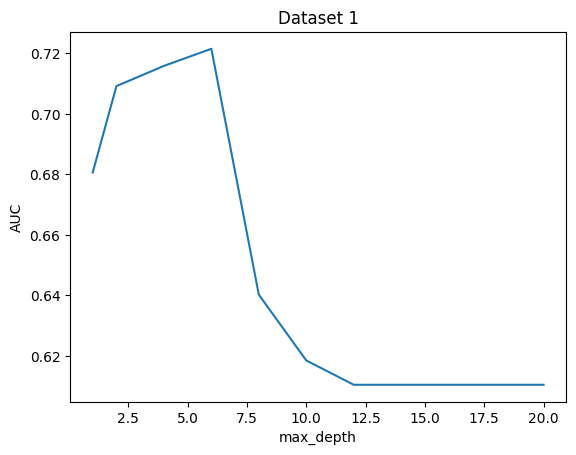

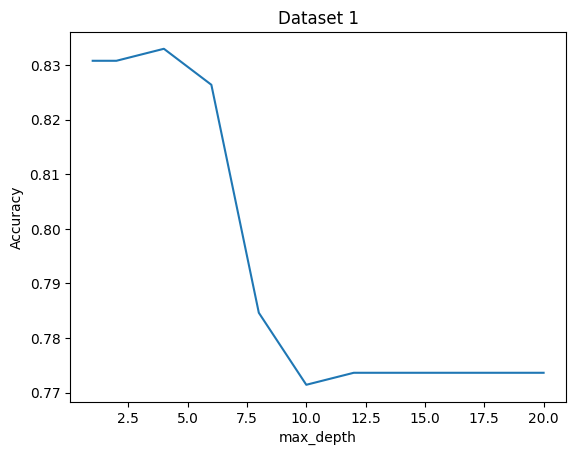

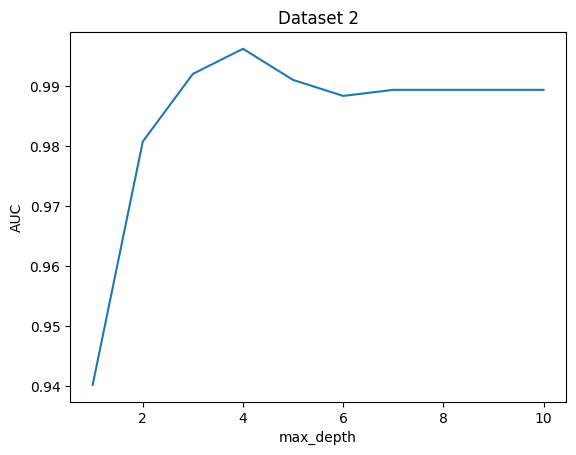

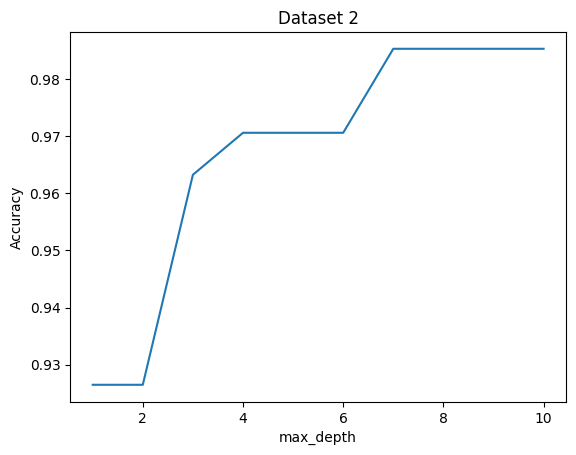

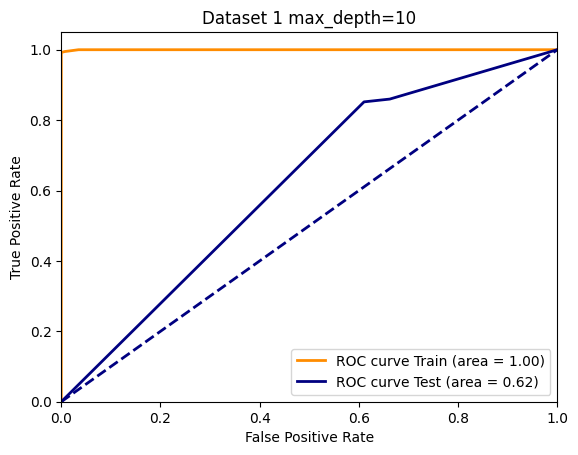

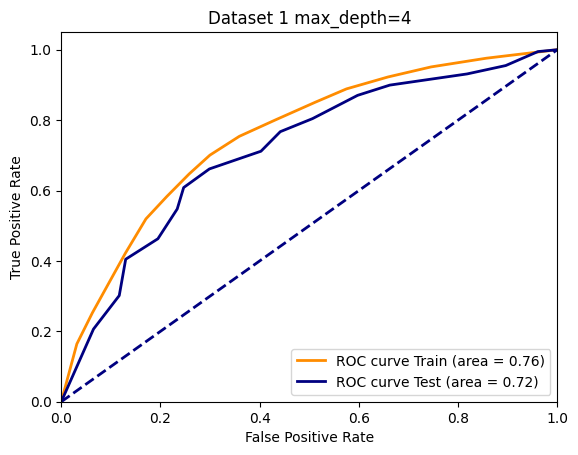

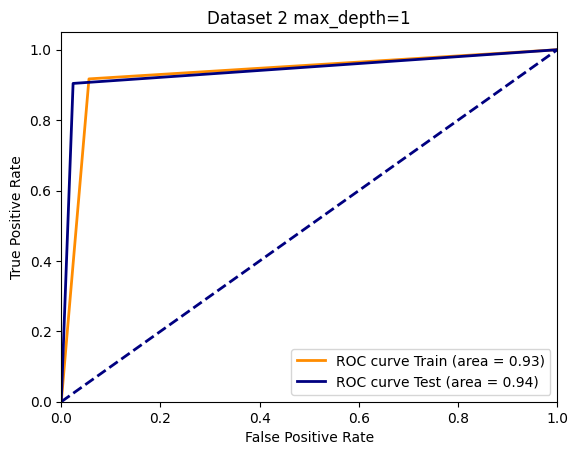

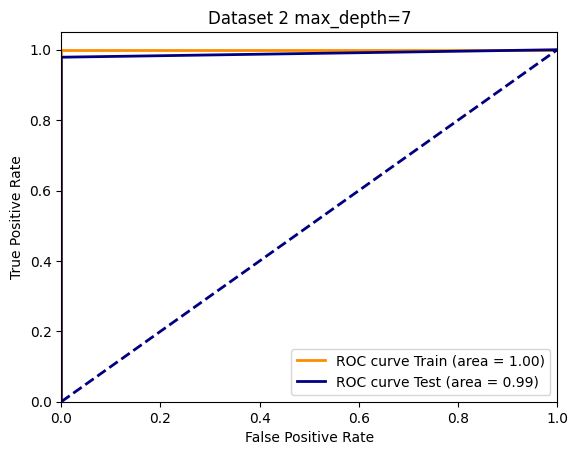

In [3033]:

# plot the results for each dataset
plot_result_exp3(results_1, 'Dataset 1')
plot_result_exp3(results_2, 'Dataset 2')

# plot the roc curve for the best max_depth value, the worst max_depth value, and the middle max_depth value
def plot_max_depth_roc(results, max_depth_values, title):
  for max_depth in max_depth_values:
    row = results[results['max_depth'] == max_depth]
    fpr = row['fpr_e'].values[0]
    tpr = row['tpr_e'].values[0]
    roc_auc = row['AUC_e'].values[0]
    fpr_t = row['fpr_t'].values[0]
    tpr_t = row['tpr_t'].values[0]
    roc_auc_t = row['AUC_t'].values[0]
    plot_t_e_roc_curve(fpr_t, tpr_t, roc_auc_t, fpr, tpr, roc_auc, title + f' max_depth={max_depth}')


def get_max_depth_to_plot(results):
  min_auc = results['Accuracy_e'].min()
  max_auc = results['Accuracy_e'].max()

  # get the k values for the min, max, and median AUC
  min_depth_values = results[results['Accuracy_e'] == min_auc]['max_depth'].iloc[0]
  max_max_depth_values = results[results['Accuracy_e'] == max_auc]['max_depth'].iloc[0]

  # get the first from each series

  # middle_k = middle_k_values.iloc[0]
  max_depth_values = [min_depth_values, max_max_depth_values]
  return max_depth_values

plot_max_depth_roc(results_1, get_max_depth_to_plot(results_1), 'Dataset 1')
plot_max_depth_roc(results_2, get_max_depth_to_plot(results_2), 'Dataset 2')

## Experiment 4: Cost and Distance functions

### Distance Functions for KNN

In [3034]:
def experiment4_a(D, k=3, test_split=0.2):
  X_t, Y_t, X_e, Y_e = train_test_split(D, test_split)

  distance_functions = [euclidean, manhattan, chebyshev, hamming, cosineSim]

  results = []

  for distance_fn in distance_functions:
    knn = KNN(k=k, similarity_fn=distance_fn)
    knn.fit(X_t, Y_t, k)
    test_label_probs = knn.predict(X_e)
    train_label_probs = knn.predict(X_t)
    fpr_t, tpr_t, roc_auc_t, accuracy_t = roc_curve(Y_t, train_label_probs)
    fpr_e, tpr_e, roc_auc_e, accuracy_e = roc_curve(Y_e, test_label_probs)

    print(f'distance_fn={distance_fn.__name__}, AUC_t={roc_auc_t}, AUC_e={roc_auc_e}, Accuracy_t={accuracy_t}, Accuracy_e={accuracy_e}')
    results.append({
      'distance_fn': distance_fn.__name__,
      'AUC_t': roc_auc_t,
      'AUC_e': roc_auc_e,
      'Accuracy_t': accuracy_t,
      'Accuracy_e': accuracy_e,
      'fpr_t': fpr_t,
      'tpr_t': tpr_t,
      'fpr_e': fpr_e,
      'tpr_e': tpr_e
    })

  results = pd.DataFrame(results)
  return results


# Run the experiment on the two datasets
results_1 = experiment4_a(dataset_1, k=70)
results_2 = experiment4_a(dataset_2, k=3)


distance_fn=euclidean, AUC_t=0.7624900188734031, AUC_e=0.7325980897409468, Accuracy_t=0.8507953922106418, Accuracy_e=0.8351648351648352
distance_fn=manhattan, AUC_t=0.7651100646051103, AUC_e=0.7469078540507111, Accuracy_t=0.8507953922106418, Accuracy_e=0.8307692307692308
distance_fn=chebyshev, AUC_t=0.7647187590737515, AUC_e=0.7287329073043359, Accuracy_t=0.8496982995063083, Accuracy_e=0.8307692307692308
distance_fn=hamming, AUC_t=0.683479193887921, AUC_e=0.6193052978767265, Accuracy_t=0.8425671969281404, Accuracy_e=0.8307692307692308
distance_fn=cosineSim, AUC_t=0.29090673998257843, AUC_e=0.30474816189101905, Accuracy_t=0.8376302797586396, Accuracy_e=0.8219780219780219
distance_fn=euclidean, AUC_t=0.9985206671501088, AUC_e=0.9863221884498481, Accuracy_t=0.9817184643510055, Accuracy_e=0.9705882352941176
distance_fn=manhattan, AUC_t=0.9987817258883249, AUC_e=0.9874620060790272, Accuracy_t=0.9817184643510055, Accuracy_e=0.9779411764705882
distance_fn=chebyshev, AUC_t=0.9985641769398115, 

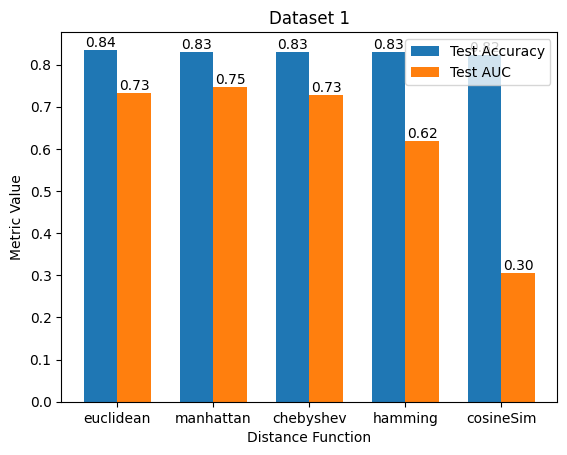

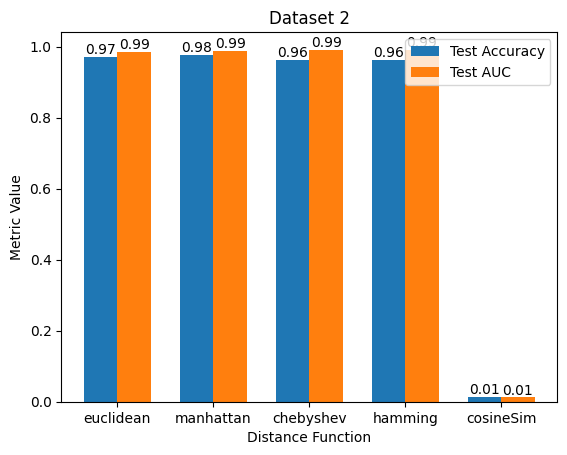

In [3035]:
def plot_result_exp4_a(results, title):
    # Number of distance functions
    n = len(results['distance_fn'])

    # Creating x positions for the bars
    x = np.arange(n)

    # Width of a bar
    width = 0.35

    # Plotting the bars
    bars1 = plt.bar(x - width/2, results['Accuracy_e'], width, label='Test Accuracy')
    bars2 = plt.bar(x + width/2, results['AUC_e'], width, label='Test AUC')

    # Adding labels, title, and legend
    plt.xlabel('Distance Function')
    plt.ylabel('Metric Value')
    plt.title(title)
    plt.xticks(x, results['distance_fn'])  # Set the x-ticks to be the distance functions
    plt.legend()

    # Adding a label on top of each bar
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2., height,
                     '%.2f' % height,
                     ha='center', va='bottom')

    # Call the function to add labels
    add_labels(bars1)
    add_labels(bars2)

    # Display the plot
    plt.show()

  

plot_result_exp4_a(results_1, 'Dataset 1')
plot_result_exp4_a(results_2, 'Dataset 2')

### Cost Functions for Decision Tree

In [3036]:
def experiment4_b(D, max_depth=3, min_leaf_instance=1, test_split=0.2):
  X_t, Y_t, X_e, Y_e = train_test_split(D, test_split)

  cost_functions = [misclassification_error, entropy, gini_index]

  results = []
  for cost_fn in cost_functions:
    dt = DT(max_depth=max_depth, min_leaf_instance=min_leaf_instance, cost_fn=cost_fn)
    dt.fit(X_t, Y_t)
    test_label_probs = get_dt_probs(dt, X_e, max_depth, min_leaf_instance)
    train_label_probs = get_dt_probs(dt, X_t, max_depth, min_leaf_instance)
    fpr_t, tpr_t, roc_auc_t, accuracy_t = roc_curve(Y_t, train_label_probs)
    fpr_e, tpr_e, roc_auc_e, accuracy_e = roc_curve(Y_e, test_label_probs)

    print(f'cost_fn={cost_fn.__name__}, AUC_t={roc_auc_t}, AUC_e={roc_auc_e}, Accuracy_t={accuracy_t}, Accuracy_e={accuracy_e}')
    results.append({
      'cost_fn': cost_fn.__name__,
      'AUC_t': roc_auc_t,
      'AUC_e': roc_auc_e,
      'Accuracy_t': accuracy_t,
      'Accuracy_e': accuracy_e,
      'fpr_t': fpr_t,
      'tpr_t': tpr_t,
      'fpr_e': fpr_e,
      'tpr_e': tpr_e
    })

  results = pd.DataFrame(results)
  return results

# Run the experiment on the two datasets
results_1 = experiment4_b(dataset_1, max_depth=4)
results_2 = experiment4_b(dataset_2, max_depth=4)

cost_fn=misclassification_error, AUC_t=0.6353111843060395, AUC_e=0.584054834054834, Accuracy_t=0.8507953922106418, Accuracy_e=0.8307692307692308
cost_fn=entropy, AUC_t=0.7814847833188153, AUC_e=0.6761320689892119, Accuracy_t=0.843664289632474, Accuracy_e=0.8285714285714286
cost_fn=gini_index, AUC_t=0.7567429315476191, AUC_e=0.715866144437573, Accuracy_t=0.8447613823368074, Accuracy_e=0.832967032967033
cost_fn=misclassification_error, AUC_t=0.9770630891950688, AUC_e=0.9860688956433639, Accuracy_t=0.9744058500914077, Accuracy_e=0.9779411764705882
cost_fn=entropy, AUC_t=0.996947063089195, AUC_e=0.9962006079027356, Accuracy_t=0.9707495429616088, Accuracy_e=0.9632352941176471
cost_fn=gini_index, AUC_t=0.9969398114575779, AUC_e=0.9962006079027355, Accuracy_t=0.9707495429616088, Accuracy_e=0.9705882352941176


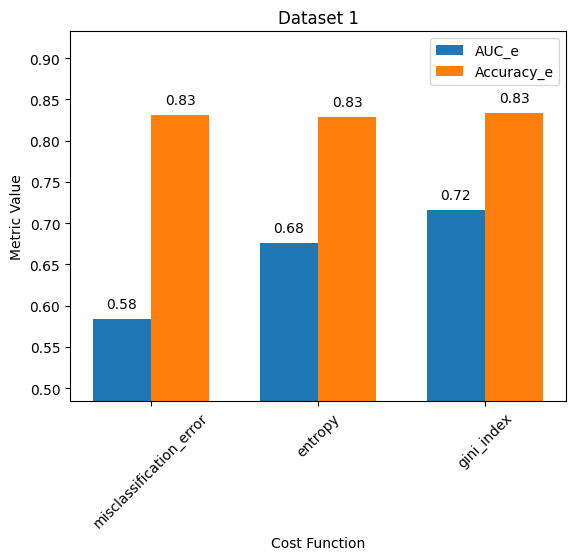

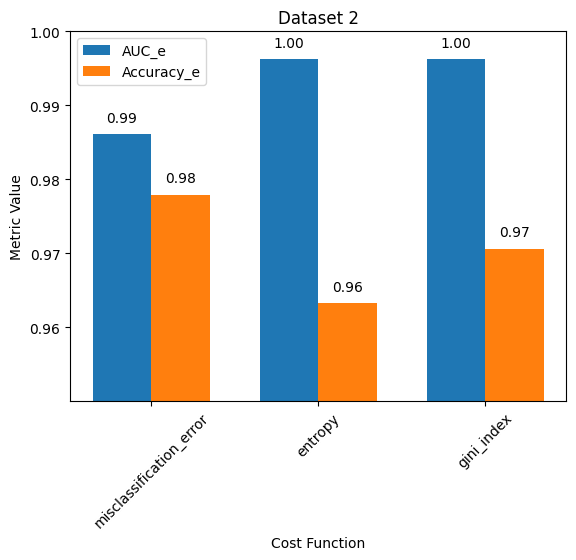

In [3037]:
# plot results

def plot_result_exp4_b(results, title):
    # Width of a bar
    width = 0.35

    # Number of cost functions
    n = len(results['cost_fn'])

    # Creating x positions for the bars
    x = np.arange(n)

    # Plotting the bars
    bars1 = plt.bar(x - width/2, results['AUC_e'], width, label='AUC_e')
    bars2 = plt.bar(x + width/2, results['Accuracy_e'], width, label='Accuracy_e')

    # Adding labels, title, and legend
    plt.xlabel('Cost Function')
    plt.ylabel('Metric Value')
    plt.title(title)
    plt.xticks(x, results['cost_fn'], rotation=45)  # Set the x-ticks to be the cost functions
    plt.legend()

    # Focus the window on the differences between the bars
    min_y_lim = min(results['AUC_e'].min(), results['Accuracy_e'].min())
    max_y_lim = max(results['AUC_e'].max(), results['Accuracy_e'].max())
    diff = max_y_lim - min_y_lim
    buffer = diff * 0.4
    plt.ylim(max(0, min_y_lim - buffer), min(1, max_y_lim + buffer))

    # Display the value for each bar
    def add_labels(bars, buffer):
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2., height + buffer * 0.1, 
                     f'{height:.2f}', ha='center', va='bottom')

    # Call the function to add labels
    add_labels(bars1, buffer)
    add_labels(bars2, buffer)

    # Show the plot
    plt.show()
  

  



plot_result_exp4_b(results_1, 'Dataset 1')
plot_result_exp4_b(results_2, 'Dataset 2')

# Experiment 5: ROC curve comparison

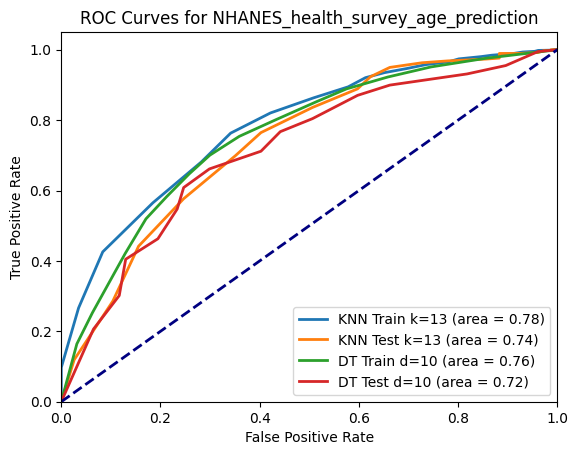

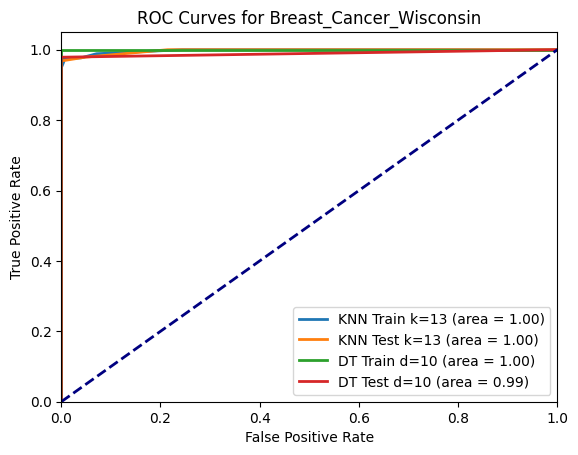

In [3038]:
plot_multiple_roc_curves(d1_curves, f'ROC Curves for {DATA_SET_1_NAME}')
# plot_accuracy_bar_chart(d1_accuracies, f'Accuracy for {DATA_SET_1_NAME}')

plot_multiple_roc_curves(d2_curves, f'ROC Curves for {DATA_SET_2_NAME}')
# plot_accuracy_bar_chart(d2_accuracies, f'Accuracy for {DATA_SET_2_NAME}')

## Experiment 6: Key Feature Selection for KNN
- We selected key features by dropping the features with the lowest squared difference from the target.
- This allowed us to remove features that were not strongly associated with the target and are hard to separate.

## Experiment 7: Feature Selection

- Feature importance is a measure of how relevant a feature is in predicting the target variable. This can also be thought as corelation between the feature and the target variable. - We will use the feature importance to select the most important features and evaluate the models with the selected features.
- One way to measure feature important is to see how much a feature is used to reduce the cost of a split in a decision tree.
- We can measure this by considering how much a single nodes split is able to reduce its current cost. 
- To calculate this for a node j, we can use the following formula:
    - $cost_{j} = \frac{N_{j}}{N_{j}} * cost_{j} - \frac{N_{j_R}}{N_{j}} * cost_{j_R} - \frac{N_{j_L}}{N_{j}} * cost_{j_L}$
    - where $N_{j}$ is the number of samples in node j, $N_{j_R}$ is the number of samples in the right child of node j, $N_{j_L}$ is the number of samples in the left child of node j, $cost_{j}$ is the cost of node j, $cost_{j_R}$ is the cost of the right child of node j, and $cost_{j_L}$ is the cost of the left child of node j.
- To calculate the feature importance of feature d, we sum up the reduction in cost for all nodes that use feature d to split.
    - $importance_{d} = \sum_{j \in nodes} I(feature_{j} = d) * cost_{j}$


- Initiatially we will use a simpler method for calculating feature importance. We will simply count up the number of used nodes that use a feature to split. We will then use this count as the feature importance.

In [3039]:
# we will use a simpler way to measure 
def get_feature_importance(dt):

  # traverse the node structure from the root, and keep track of the number of times
  # each feature is used in a split

  feature_counts = {}

  def traverse(node):
    if node.left is None and node.right is None:
      return
    if node.split_feature in feature_counts:
      feature_counts[node.split_feature] += 1
    else:
      feature_counts[node.split_feature] = 1
    traverse(node.left)
    traverse(node.right)
  traverse(dt.root)

  # convert the counts into a data frame
  # make sure to input 0 for features that were not used
  for feature in dt.X.columns:
    if feature not in feature_counts:
      feature_counts[feature] = 0
  feature_counts = pd.DataFrame(feature_counts.items(), columns=['Feature', 'Count'])
  # sort the data frame by the count
  feature_counts = feature_counts.sort_values(by='Count', ascending=False)
  return feature_counts


# load the datasets again, without dropping any features
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887) 
dataset_1_full = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data

dataset_1_full.name = 'NHANES_Age_Prediction_Full'
DATA_SET_1_FULL_NAME = dataset_1_full.name

# # DATASET 2: Breast Cancer Wisconsin
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
dataset_2 = breast_cancer_wisconsin_original.data

dataset_2.name = 'Breast_Cancer_Wisconsin'
DATA_SET_2_NAME = dataset_2.name

# clean, and normalize the data
def clean_and_normalize_data(D):
  # drop rows with missing values
  D = clean(D)
  D = normalize(D)
  return D

dataset_1_full = clean_and_normalize_data(dataset_1_full)
dataset_2_full = clean_and_normalize_data(dataset_2)


def experiment5_a(D, test_split=0.2, k=3, max_depth=3, min_leaf_instance=1):
  X_t, Y_t, X_e, Y_e = train_test_split(D, test_split)


  dt = DT(max_depth=max_depth, min_leaf_instance=min_leaf_instance)
  dt.fit(X_t, Y_t)

  feature_counts = get_feature_importance(dt)

  return feature_counts

print('Feature Importance using Decision Tree')
exp5a_feature_counts_d1 = experiment5_a(dataset_1_full)
exp5a_feature_counts_d2 = experiment5_a(dataset_2_full)
print(exp5a_feature_counts_d1)
print(exp5a_feature_counts_d2)

# for comparison we will print the feature importance using mean squared error from before
print('Feature Importance using Mean Squared Error')
exp5a_msr_d1 = feature_ranking(dataset_1_full)
exp5a_msr_d2 = feature_ranking(dataset_2_full)
print(exp5a_msr_d1)
print(exp5a_msr_d2)




# put all the data into on data frame
# cols:  Dataset, Feature, DT Importance, MSE 
# rows: 1 row for each feature, for each dataset

# check they are all the same length

dataset_col = [DATA_SET_1_FULL_NAME] * len(exp5a_feature_counts_d1) + [DATA_SET_2_NAME] * len(exp5a_feature_counts_d2)
feature_col = list(exp5a_feature_counts_d1['Feature']) + list(exp5a_feature_counts_d2['Feature'])
dt_importance_col = list(exp5a_feature_counts_d1['Count']) + list(exp5a_feature_counts_d2['Count'])
mse_importance_col = list(exp5a_msr_d1['Value']) + list(exp5a_msr_d2['Value'])

print(dataset_col)
print(feature_col)
print(dt_importance_col)
print(mse_importance_col)



exp_5_df = pd.DataFrame({
  'Dataset': dataset_col,
  'Feature': feature_col,
  'DT Importance': dt_importance_col,
  'MSE Importance': mse_importance_col
})

print(exp_5_df)

# display the data frame
exp5_table = create_table_graph(exp_5_df)
exp5_table.show()




features_missing: 0
targets_missing: 0
0 rows deleted
features_missing: 16
targets_missing: 0
16 rows deleted
Feature Importance using Decision Tree
    Feature  Count
0    LBXGLT      3
1    BMXBMI      2
2     LBXIN      2
3  RIAGENDR      0
4    PAQ605      0
5    LBXGLU      0
6    DIQ010      0
                       Feature  Count
0      Uniformity_of_cell_size      2
1                  Bare_nuclei      2
2              Clump_thickness      2
3              Bland_chromatin      1
4     Uniformity_of_cell_shape      0
5            Marginal_adhesion      0
6  Single_epithelial_cell_size      0
7              Normal_nucleoli      0
8                      Mitoses      0
Feature Importance using Mean Squared Error
    Feature      Value  Rank
0    LBXGLT  4.400e-01     1
1    LBXGLU  1.010e-01     2
2    PAQ605  6.689e-02     3
3     LBXIN  3.065e-02     4
4    DIQ010  5.189e-03     5
5    BMXBMI  1.280e-04     6
6  RIAGENDR  5.701e-05     7
                       Feature  Value  Rank

/var/folders/68/c6p0bwys2ld4z8kt07xh18cc0000gn/T/ipykernel_23026/3070378217.py:33: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



#### Feature Importance Observations:
- Dataset 1:
    - We can see that `LBXGLT` was the prominent feature in both methods.
    - Interestingly `BMXBMI` was second using the decision tree method, but was second last using mean squared difference.
    - `RIAGENDR` was the least important feature using the decision tree method and second last using mean squared difference.
- Dataset 2:
    - `Clump Thickness` was the most important feature in decision tree method
    - `Bare nuclei` was the most important feature in mean squared difference method
    - `Uniformity of Cell Size` was the second most important feature in both methods
    - `Mitoses` was the least important feature in both methods, same with `single epithelial cell size`



### Feature importance by feature cost reduction

In [3040]:

def cost_reduction(node, feature_d, total_num_samples, C):
  # cost _reduction = cost(parent) - (cost(left) + cost(right))
  # gini = cost
  p_n = len(node.Y) / total_num_samples
  p_n_l = len(node.left.Y) / total_num_samples
  p_n_r = len(node.right.Y) / total_num_samples
  cost_reduction = p_n * gini_index(node.Y, C) - (p_n_l * gini_index(node.left.Y, C) + p_n_r * gini_index(node.right.Y, C))
  return cost_reduction

def get_feature_cost_reduction(dt):

  # initialize all features to 0
  feature_cost_reduction = { feature: 0 for feature in dt.X.columns }


  def traverse(node):
    if node.left is None and node.right is None:
      return
    feature = node.split_feature
    feature_cost_reduction[feature] += cost_reduction(node, feature, len(dt.Y), dt.C)
    traverse(node.left)
    traverse(node.right)
  traverse(dt.root)

  # convert the counts into a data frame
  # make sure to input 0 for features that were not used
  for feature in dt.X.columns:
    if feature not in feature_cost_reduction:
      feature_cost_reduction[feature] = 0
  feature_cost_reduction = pd.DataFrame(feature_cost_reduction.items(), columns=['Feature', 'Cost Reduction'])
  # sort the data frame by the count
  feature_cost_reduction = feature_cost_reduction.sort_values(by='Cost Reduction', ascending=False)
  return feature_cost_reduction

def experiment5_b(D, test_split=0.2, max_depth=3, min_leaf_instance=1):
  X_t, Y_t, X_e, Y_e = train_test_split(D, test_split)

  dt = DT(max_depth=max_depth, min_leaf_instance=min_leaf_instance)
  dt.fit(X_t, Y_t)

  feature_cost_reduction = get_feature_cost_reduction(dt)

  return feature_cost_reduction

print('Feature Cost Reduction using Decision Tree')
print(experiment5_b(dataset_1_full))
print(experiment5_b(dataset_2_full))

from pandas.plotting import table
# display as tanble










Feature Cost Reduction using Decision Tree
    Feature  Cost Reduction
5    LBXGLT         379.198
2    BMXBMI          29.676
6     LBXIN          25.137
0  RIAGENDR           0.000
1    PAQ605           0.000
3    LBXGLU           0.000
4    DIQ010           0.000
                       Feature  Cost Reduction
1      Uniformity_of_cell_size         233.718
5                  Bare_nuclei          14.201
0              Clump_thickness           1.718
6              Bland_chromatin           0.775
2     Uniformity_of_cell_shape           0.000
3            Marginal_adhesion           0.000
4  Single_epithelial_cell_size           0.000
7              Normal_nucleoli           0.000
8                      Mitoses           0.000


In [3041]:

import matplotlib.pyplot as plt
from pandas.plotting import table
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

def display_table(df, font_size=12):
    df = df.copy()
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = df[col].apply(lambda x: f'{x:.3f}')
    # Find the maximum width of the index column
    idx_max_width = max([len(str(idx)) for idx in df.index]) * font_size * 0.01

    # Find the maximum width of the data and headers
    col_max_widths = [max(df[col].astype(str).apply(lambda x: len(x)).max(), len(col)) 
                      for col in df.columns]

    # Calculate the total width of the table
    total_width = idx_max_width + sum(col_max_widths) * font_size * 0.01

    # Estimate height of the table based on number of rows
    total_height = len(df) * font_size * 0.010

    # Create figure
    fig, ax = plt.subplots(figsize=(total_width, total_height))
    ax.axis('off')
    
    # Create the table
    tbl = table(ax, df, loc='center', cellLoc='center', rowLoc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(font_size)
    tbl.scale(1.2, 1.2) # Scaling factor for table size

    # Draw canvas once to compute precise bounding boxes
    canvas = FigureCanvas(fig)
    canvas.draw()

    # Adjust layout to make room for the table
    bbox = tbl.get_window_extent(canvas.get_renderer())
    fig.set_size_inches(bbox.width / fig.dpi, bbox.height / fig.dpi)

    # plt.savefig('/mnt/data/table_plot.png', bbox_inches='tight', dpi=300)
    plt.show()


exp_8_table_d1 = create_table_graph(experiment5_b(dataset_1_full))
exp_8_table_d1.show()

exp_8_table_d2 = create_table_graph(experiment5_b(dataset_2_full))
exp_8_table_d2.show()


/var/folders/68/c6p0bwys2ld4z8kt07xh18cc0000gn/T/ipykernel_23026/3070378217.py:33: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



/var/folders/68/c6p0bwys2ld4z8kt07xh18cc0000gn/T/ipykernel_23026/3070378217.py:33: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

